In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline
import numpy as np
from numpy.polynomial import Polynomial
from sklearn.linear_model import LinearRegression

In [2]:
filename = '50_Startups.csv'

In [3]:
#Don't think too much about the getDataset method. It is used for convenience
def getDataset(filename, **kwargs):
    url = f'https://github.com/IvanReznikov/mdx-msc-data-science/raw/main/datasets/{filename}'
    try:
        import os
        if filename not in os.listdir():
            !pip install wget
            import wget
            downloaded_filename = wget.download(url)
            print(f'{downloaded_filename} file downloaded')
        else:
            print(f'{filename} already exists')
        return pd.read_csv(filename, **kwargs)
        
    except Exception as e:
        print(e)
        return pd.read_csv(url, **kwargs)

In [4]:
df = getDataset(filename)

Defaulting to user installation because normal site-packages is not writeable
50_Startups.csv file downloaded


In [5]:
df.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

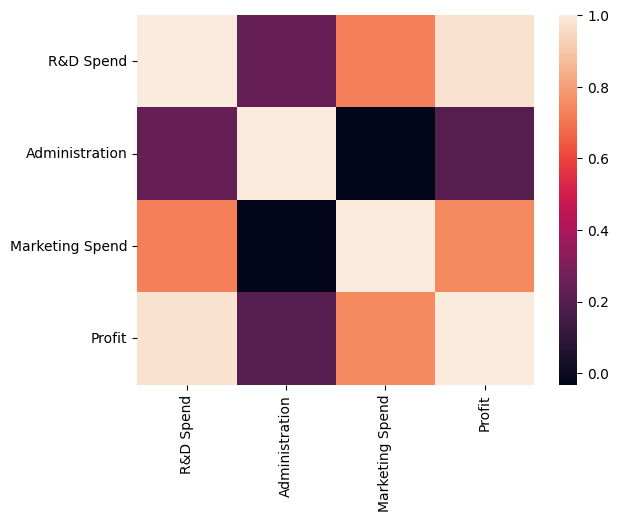

In [6]:
sns.heatmap(df.corr())
plt.show()

In [7]:
df.nunique()

R&D Spend          49
Administration     50
Marketing Spend    48
State               3
Profit             50
dtype: int64

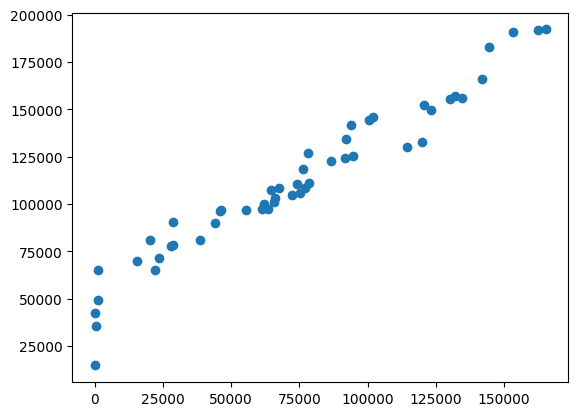

In [8]:
plt.scatter(df['R&D Spend'], df['Profit'])
plt.show()

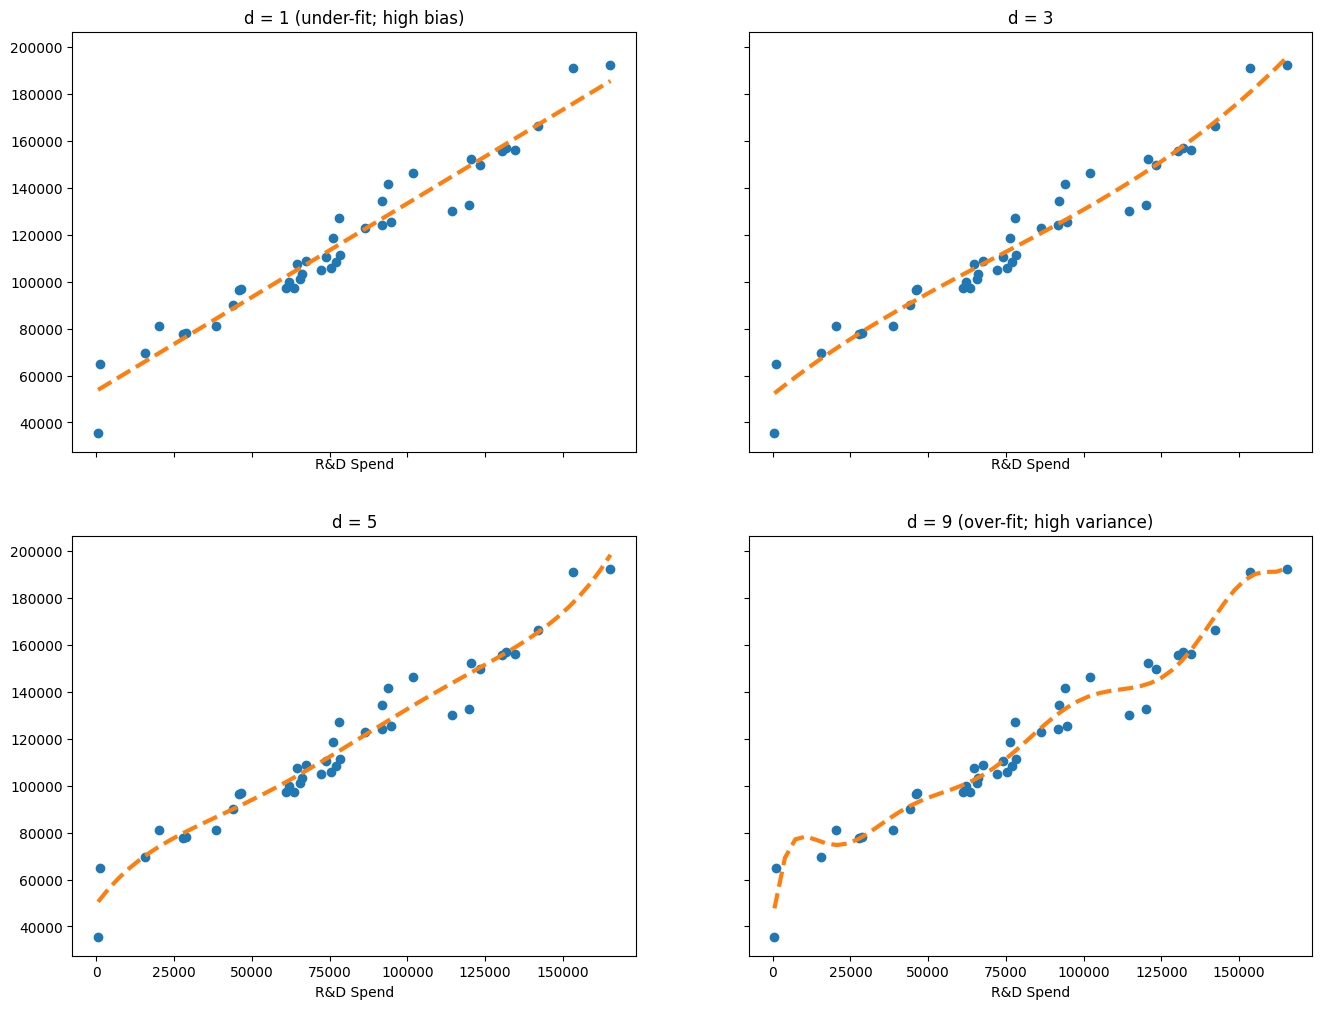

In [9]:
df = pd.read_csv('50_Startups.csv')
df = df.sample(frac=1, random_state=81).reset_index(drop=True)
p_order = [1, 3, 5, 9]
titles = ['d = {0} (under-fit; high bias)'.format(p_order[0]),
          'd = {0}'.format(p_order[1]),
          'd = {0}'.format(p_order[2]),
          'd = {0} (over-fit; high variance)'.format(p_order[3])]

x_label = 'R&D Spend'
y_label = 'Profit'
train_df = df.iloc[:40].sort_values(x_label)
test_df  = df.iloc[40:].sort_values(x_label)

X_train = train_df[x_label]
X_test  = test_df[x_label]
y_train = train_df[y_label]
y_test  = test_df[y_label]

f, axes = plt.subplots(2,2, figsize=(16, 12), sharex = True, sharey = True)

for i, d in enumerate(p_order):
    coefficients = np.polyfit(X_train, y_train, deg=d)
    poly = np.poly1d(coefficients)
    X_linspace = np.linspace(X_train.iloc[0], X_train.iloc[-1])
    y_linspace = poly(X_linspace)
    axes[i//2,i%2].plot(X_train, y_train, 'o', X_linspace, y_linspace, '--', linewidth=3)
    #axes[i//2,i%2].scatter(X_test, y_test, s=100, marker='o', color="red")
    axes[i//2,i%2].set_xlabel(x_label)
    axes[i//2,i%2].set_title(titles[i])
    
plt.show()

In [10]:
#Perform ols model prediction similar to Linear_part1